In [0]:
# !pip install pandas

!pip install -U -q PyDrive

In [0]:
import matplotlib.pyplot as plt
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot
import sklearn.utils

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [0]:
def ReadFileFromGDrive(sharable_link, file_name, read_local, sheet_index):
  
  if read_local:
    print('Read Sheet index ' , sheet_index)
    return pd.read_excel(file_name, sheet_name  = sheet_index)
  
  # Authenticate and create the PyDrive client.
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)

  link = sharable_link # The shareable link

  fluff, id = link.split('=')
  print (id) # Verify that you have everything after '='

  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile(file_name)  
  return pd.read_excel(file_name, sheetname=1)
# --------------------------
def ReadExcel(file_name):
  print('read')
  xlsx = pd.ExcelFile(file_name)
  sheets = []
  print(xlsx.sheet_names)
  for sheet in xlsx.sheet_names:
    sheets.append(xlsx.parse(sheet))
    all_sheets = pd.concat(sheets)
  return all_sheets

In [0]:
students_frame = ReadFileFromGDrive(sharable_link = 'https://drive.google.com/open?id'
                                    ,file_name = 'StudentsClass9Average.xlsx' , read_local= True,sheet_index = 7)


print(students_frame.shape)

Read Sheet index  7
(11387, 33)


In [0]:
print(students_frame.shape)

(11387, 33)


In [0]:
students_frame = students_frame.drop('StageType', axis = 1)
students_frame = students_frame.drop('grade', axis = 1)
students_frame = students_frame.drop('StudentCode', axis = 1)
print(students_frame.shape)
students_frame.head(3)

(11387, 30)


,Sex,Shift,RegionCode,SchoolType,SchoolCode,Nationality,Religion,MarriageState,FamilyState,BodyState,FatherJob,FatherMadrak,HouseState,JaheshiRahnamaee,LeftHand,StudentType,MotherJob,StudentState,SoldierState,OstanCode,NumberOfChilds,NoChild,MotherMadrak,HistoryRegionCode,Average,AverageLabel,avg8,Name,HistoryRegionName,OstanName
0,2,1,1655,4,53488001,1,1,0,0,0,0,6,0,0,0,1,0,1,0,11,0,0,0,1655,13.023810,3,19.642857,سما3,سبزوار,شهر تهران
1,1,1,5702,4,95108326,1,1,0,0,0,10,8,0,0,0,1,4,1,0,57,1,1,8,5702,19.119048,1,20.000000,بهارستان,زنجان ناحيه ٢,زنجان
2,2,1,2403,4,95121488,1,1,0,0,0,10,4,0,0,0,1,4,1,0,11,0,1,6,2403,19.976190,1,19.952381,نشاط,کرج ناحيه 3,شهر تهران


In [0]:
def Normalize_Column(data, target_columns):
  for target in target_columns:
    data[target]=((data[target]-data[target].min())/(data[target].max()-data[target].min()))*20
  return data

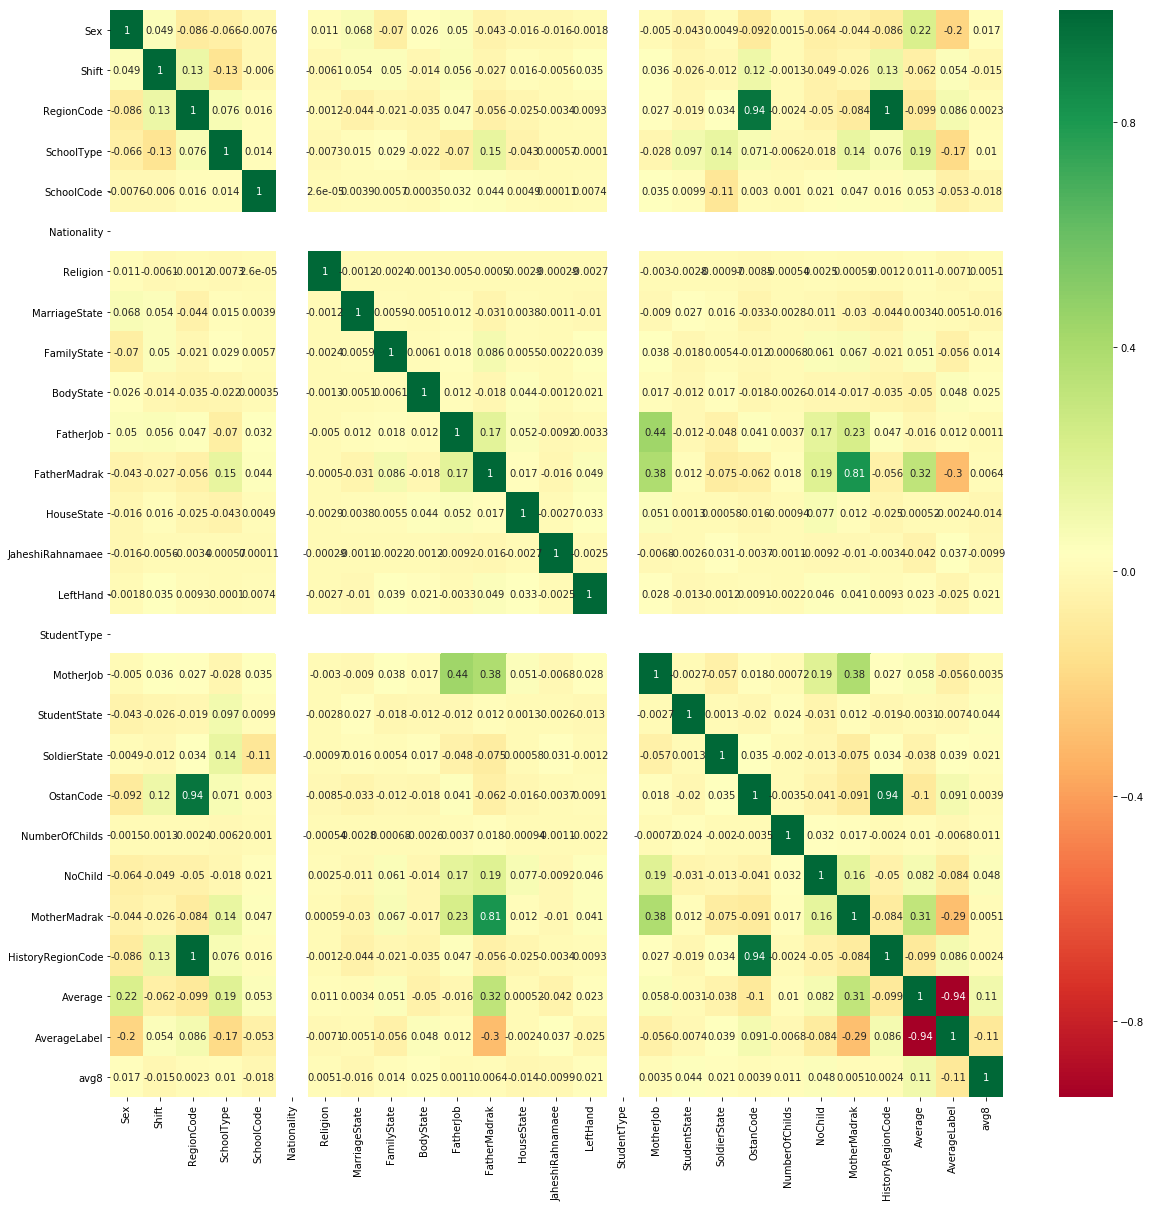

Highly correlated features to Average:


Average         1.000000
AverageLabel    0.935744
FatherMadrak    0.319544
MotherMadrak    0.312938
Sex             0.220426
SchoolType      0.187225
avg8            0.107124
OstanCode       0.103001
Name: Average, dtype: float64

In [0]:
hm_input = students_frame.iloc[:,0:27]
# hm_input  = Normalize_Column(hm_input, ['Sex','Shift','RegionCode','SchoolType','SchoolCode','Nationality','Religion','MarriageState','FamilyState',
#                                         'BodyState','FatherJob','FatherMadrak','HouseState','LeftHand','StudentType','MotherJob','StudentState','SoldierState',
#                                         'OstanCode','NumberOfChilds','NoChild','MotherMadrak','HistoryRegionCode'])
# -----------------------------------------------
# Create HeatMap
X = hm_input.iloc[:,0:27]  #independent columns
y = hm_input['Average']   #target column

#get correlations of each features in dataset
students_corr = hm_input.corr()
top_corr_features = students_corr.index
plot.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(hm_input[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plot.show()

# -----------------------------------------------
#Correlation with output variable
cor_target = abs(students_corr["Average"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>=0.1]

print('Highly correlated features to Average:')

relevant_features.sort_values(ascending= False)


In [0]:
# new_header = students_frame.iloc[0] #grab the first row for the header
# students_frame = students_frame[1:] #take the data less the header row
# students_frame.columns = new_header #set the header row as the df header

# students_train = students_frame.iloc[:,1:]
# students_train = students_train.astype(float)

def create_train_test(target_dataset):
  return train_test_split(target_dataset,target_dataset["AverageLabel"],test_size=0.3,random_state=42)

# students_train,students_test,y_train,y_test =create_train_test(students_frame)
students_train = students_frame
students_train.head(3)

,Sex,Shift,RegionCode,SchoolType,SchoolCode,Nationality,Religion,MarriageState,FamilyState,BodyState,FatherJob,FatherMadrak,HouseState,JaheshiRahnamaee,LeftHand,StudentType,MotherJob,StudentState,SoldierState,OstanCode,NumberOfChilds,NoChild,MotherMadrak,HistoryRegionCode,Average,AverageLabel,avg8,Name,HistoryRegionName,OstanName
0,2,1,1655,4,53488001,1,1,0,0,0,0,6,0,0,0,1,0,1,0,11,0,0,0,1655,13.023810,3,19.642857,سما3,سبزوار,شهر تهران
1,1,1,5702,4,95108326,1,1,0,0,0,10,8,0,0,0,1,4,1,0,57,1,1,8,5702,19.119048,1,20.000000,بهارستان,زنجان ناحيه ٢,زنجان
2,2,1,2403,4,95121488,1,1,0,0,0,10,4,0,0,0,1,4,1,0,11,0,1,6,2403,19.976190,1,19.952381,نشاط,کرج ناحيه 3,شهر تهران


In [0]:
students_train.shape

(11387, 30)

In [0]:
# Get Label for Sex Enum
def Label_Sex (row):
  target_item = 'Sex'  
  if row[target_item] == 1 :
    return 'Boy'
  if row[target_item] == 2 :
    return 'Girl'
  return 'NAN'
# -----------------------------------------------------
# Get Label for Shift Enum
def Label_Shift (row):
  target_item = 'Shift'  
  if row[target_item] == 1 :
    return 'صبح'
  if row[target_item] == 2 :
    return 'عصر'
  return 'NAN'
# -----------------------------------------------------
# Get Label for Nationality Enum
def Label_Nationality (row):
  target_item = 'Nationality'    
  if row[target_item] == 1 :
    return 'ايران'
  if row[target_item] == 2 :
    return 'افغانستان'
  if row[target_item] == 3 :
    return 'عراق'
  if row[target_item] == 4 :
    return 'ترکيه'
  if row[target_item] == 5 :
    return 'پاکستان'
  if row[target_item] == 6 :
    return 'ترکمنستان'
  if row[target_item] == 7 :
    return 'تاجيکستان'
  if row[target_item] == 8 :
    return 'آذربايجان'
  if row[target_item] == 9 :
    return 'حوزه خليج فارس وعمان'
  if row[target_item] == 10 :
    return 'سايرکشورهاي عربي'
  if row[target_item] == 11 :
    return 'آسياي شرقي'
  if row[target_item] == 12 :
    return 'سايرآسيا'
  if row[target_item] == 13 :
    return 'اروپا'
  if row[target_item] == 14 :
    return 'استراليا'
  if row[target_item] == 15 :
    return 'آفريقا'
  if row[target_item] == 16 :
    return 'قاره آمريکا'
  if row[target_item] == 17 :
    return 'ساير کشورها'
  if row[target_item] == 19 :
    return 'ایراني فاقد شناسنامه'  
  if row[target_item] == 20 :
    return 'نا مشخص'  

  return 'NAN'
# -----------------------------------------------------
# Get Label for Religion Enum
def Label_Religion (row):
  target_item = 'Religion'  
  if row[target_item] == 1 :
    return 'اسلام'
  if row[target_item] == 2 :
    return 'مسیحی'
  if row[target_item] == 3 :
    return 'کلیمی'
  if row[target_item] == 4 :
    return 'زرتشتی'  
  return 'NAN'
# -----------------------------------------------------
# Get Label for MarriageState Enum
def Label_MarriageState (row):
  target_item = 'MarriageState'  
  if row[target_item] == 0 :
    return 'مجرد'
  if row[target_item] == 1 :
    return 'متاهل'
  if row[target_item] == 2 :
    return 'معیل'
  if row[target_item] == 3 :
    return 'متکفل' 
  return 'NAN'
# -----------------------------------------------------
# Get Label for FamilyState Enum
def Label_FamilyState (row):
  target_item = 'FamilyState'  
  if row[target_item] == 0 :
    return 'عادي'
  if row[target_item] == 1 :
    return 'فرزند شهيد'
  if row[target_item] == 2 :
    return 'فرزندجانبازتا50'
  if row[target_item] == 3 :
    return 'فرزندجانباز 50 تا70' 
  if row[target_item] == 4 :
    return 'جانباز 70 به بالا'
  if row[target_item] == 5 :
    return 'فرزند آزاده'
  if row[target_item] == 6 :
    return 'فرزند مفقودالاثر'
  if row[target_item] == 9 :
    return 'فرند رزمنده'
  if row[target_item] == 7 :
    return 'فرزند ایثارگر'  
  return 'NAN'
# -----------------------------------------------------
# Get Label for BodyState Enum
def Label_BodyState (row):
  target_item = 'BodyState'  
  if row[target_item] == 0 :
    return 'سالم'
  if row[target_item] == 1 :
    return 'دارای معلولیت'
  return 'NAN'
# -----------------------------------------------------
# Get Label for Job Enum
def Label_Job (row, target_item):
  if row[target_item] == 1 :
    return 'Farhangi'
  if row[target_item] == 2 :
    return 'Nezami-Entezami'
  if row[target_item] == 3 :
    return 'Behdashti-Darmani'
  if row[target_item] == 4 :
    return 'Khane dar'
  if row[target_item] == 5 :
    return 'Sayer Karmandan Dolat'
  if row[target_item] == 6 :
    return 'Azad Tejari'
  if row[target_item] == 7 :
    return 'Azad Sanati'
  if row[target_item] == 8 :
    return 'Keshavarzi-Damdari'
  if row[target_item] == 9 :
    return 'Azad Honari-Khadamati'
  if row[target_item] == 10 :
    return 'Karmand Gheyre Dolati'
  if row[target_item] == 11 :
    return 'Kargar Sade'
  if row[target_item] == 12 :
    return 'Bazneshaste'
  if row[target_item] == 13 :
    return 'Bikar'
  if row[target_item] == 14 :
    return 'Fout Karde'
  if row[target_item] == 15 :
    return 'Sayer'
  return 'NAN'
# -----------------------------------------------------
# Get Label for Madrak Enum
def Label_Madrak (row, target_item):
  if row[target_item] == 1 :
    return 'Bisavad'#'بيسواد'
  if row[target_item] == 2 :
    return 'Tahsilat-Ghadim'#'تحصيلات قديم'
  if row[target_item] == 3 :
    return 'Nehzat'#'مقدماتي نهضت'
  if row[target_item] == 4 :
    return 'Ebtedaee'#'ابتدايي'
  if row[target_item] == 5 :
    return 'Sikl'#'راهنمايي/سيکل'
  if row[target_item] == 6 :
    return 'Diplom'#'ديپلم'
  if row[target_item] == 7 :
    return 'FoghDiplom'#'فوق دیپلم'
  if row[target_item] == 8 :
    return 'Lisance'#'ليسانس'
  if row[target_item] == 9 :
    return 'FoghLisance'#'فوق ليسانس'
  if row[target_item] == 10 :
    return 'Phd'#'دکتری'
  if row[target_item] == 11 :
    return 'Hozavi'#'تحصيلات حوزوي'
  return 'NAN'
# -----------------------------------------------------
# Get Label for HouseState Enum
def Label_HouseState (row, target_item):
  if row[target_item] == 0:
    return 'باخانواده-شخصي'
  if row[target_item] == 1 :
    return 'باخانواده-اجاره'
  if row[target_item] == 2 :
    return 'باخانواده-سازماني'
  if row[target_item] == 3 :
    return 'باخانواده-ساير'
  if row[target_item] == 4 :
    return 'خوابگاه دانش آموزي'
  if row[target_item] == 5 :
    return 'منزل بستگان'
  if row[target_item] == 6 :
    return 'منزل اجاره اي'
  if row[target_item] == 7 :
    return 'ساير'
  if row[target_item] == 8 :
    return 'عشاير'
  return 'NAN'
# -----------------------------------------------------
# Get Label for StudentType Enum
def Label_StudentType (row, target_item):
  if row[target_item] == 1 :
    return 'Aadi'#'عادي'
  if row[target_item] == 2 :
    return 'Davtalab Azad'#'داوطلب آزاد'
  if row[target_item] == 3 :
    return 'Mashmoul Band 5-3 Shivename Tatbigh'#'مشمول بند 3-5 شیوه نامه تطبیق'
  if row[target_item] == 4 :
    return 'Tatbigh Moaadel Dar'#'تطبیق معدل دار'
  if row[target_item] == 5 :
    return 'Tizhoush'#'تیز هوش'
  return 'NAN'
# -----------------------------------------------------
# Get Label for StudentState Enum
def Label_StudentState (row, target_item):
  if row[target_item] == 1 :
    return 'فعال'
  if row[target_item] == 2 :
    return 'انتقال رفته'
  if row[target_item] == 3 :
    return 'ضمن سال رفته'
  if row[target_item] == 4 :
    return 'ترک تحصيل'
  if row[target_item] == 5 :
    return 'اخراجي'
  if row[target_item] == 6 :
    return 'مهمان آمده'
  if row[target_item] == 7 :
    return 'مهمان رفته'
  if row[target_item] == 8 :
    return 'فارغ التحصيل'
  if row[target_item] == 9 :
    return 'فارغ التحصيل تاييد شده'
  if row[target_item] == 10 :
    return 'فوت شده'
  if row[target_item] == 11 :
    return 'فارغ التحصيل تاييد شده  از جانب سیستم متمرکز منطقه'
  if row[target_item] == 12 :
    return 'وقفه تحصيلي'
  if row[target_item] == 13 :
    return 'انتقال آمده'
  return 'NAN'

# -----------------------------------------------------
# Get Label for SoldierState Enum
def Label_SoldierState (row, target_item):
  if row[target_item] == 0:
    return 'به سن مشموليت نرسيده'
  if row[target_item] == 1 :
    return 'داراي معافيت تحصيلي'
  if row[target_item] == 2 :
    return 'داراي دفترچه آماده به خدمت'
  if row[target_item] == 3 :
    return 'داراي کارت پايان خدمت'
  if row[target_item] == 4 :
    return 'معافيت دايم'
  if row[target_item] == 5 :
    return 'معافيت موقت'
  if row[target_item] == 6 :
    return 'پرسنل نيروهاي نظامي'
  if row[target_item] == 7 :
    return 'در حال خدمت وظيفه عمومي'
  return 'NAN'

# -----------------------------------------------------
# Get Label for AverageLabel Enum
def Label_AverageLabel (row, target_item):
  if row[target_item] == 1:
    return 'VGO'# very good
  if row[target_item] == 2 :
    return 'GOO'# good
  if row[target_item] == 3 :
    return 'ACC' #acceptable
  if row[target_item] == 4 :
    return 'NME'# Need more effort
  return 'NAN'
# -----------------------------------------------------
# Get Label for Job Enum
def Label_SchoolType (row, target_item):
  if row[target_item] == 1 :
    return 'عادي'
  if row[target_item] == 2 :
    return 'نمونه دولتی'
  if row[target_item] == 3 :
    return 'نمونه مردمي'
  if row[target_item] == 4 :
    return 'غيرانتفاعي'
  if row[target_item] == 5 :
    return 'ايثارگران'
  if row[target_item] == 6 :
    return 'شاهد'
  if row[target_item] == 7 :
    return 'عشايري'
  if row[target_item] == 8 :
    return 'شبانه روزي'
  if row[target_item] == 9 :
    return 'ساير'
  if row[target_item] == 10 :
    return 'استعدادهاي درخشان'
  if row[target_item] == 11 :
    return 'نهضت سواد آموزی'
  if row[target_item] == 12 :
    return 'بزرگسالان'
  if row[target_item] == 13 :
    return 'مشارکت مردمي'
  if row[target_item] == 15 :
    return 'وابسته'
  if row[target_item] == 22 :
    return 'آموزش ازراه دور دولتی'
  if row[target_item] == 23 :
    return 'آموزش ازراه دورغيردولتی'
  if row[target_item] == 19 :
    return 'قيمت تمام شده'
  if row[target_item] == 24 :
    return 'هیات امنایی'
  if row[target_item] == 25 :
    return 'غیر دولتی خیریه'
  if row[target_item] == 26 :
    return 'غیر دولتی عام المنفعه'
  return 'NAN'

# ---------------------------------------------
# Add label of sex to dataframe
students_train['Label_Sex'] = students_train.apply (lambda row: Label_Sex(row), axis=1)

# Add label of Shift to dataframe
students_train['Label_Shift'] = students_train.apply (lambda row: Label_Shift(row), axis=1)

# Add label of Nationality to dataframe
students_train['Label_Nationality'] = students_train.apply (lambda row: Label_Nationality(row), axis=1)

# Add label of Religion to dataframe
students_train['Label_Religion'] = students_train.apply (lambda row: Label_Religion(row), axis=1)

# Add label of MarriageState to dataframe
students_train['Label_MarriageState'] = students_train.apply (lambda row: Label_MarriageState(row), axis=1)

# Add label of FamilyState to dataframe
students_train['Label_FamilyState'] = students_train.apply (lambda row: Label_FamilyState(row), axis=1)

# Add label of BodyState to dataframe
students_train['Label_BodyState'] = students_train.apply (lambda row: Label_BodyState(row), axis=1)

# Add label of FatherJob to dataframe
students_train['Label_FatherJob'] = students_train.apply (lambda row: Label_Job(row,'FatherJob'), axis=1)

# Add label of MotherJob to dataframe
students_train['Label_MotherJob'] = students_train.apply (lambda row: Label_Job(row,'MotherJob'), axis=1)

# Add label of FatherMadrak to dataframe
students_train['Label_FatherMadrak'] = students_train.apply (lambda row: Label_Madrak(row,'FatherMadrak'), axis=1)

# Add label of MotherMadrak to dataframe
students_train['Label_MotherMadrak'] = students_train.apply (lambda row: Label_Madrak(row,'MotherMadrak'), axis=1)

# Add label of HouseState to dataframe
students_train['Label_HouseState'] = students_train.apply (lambda row: Label_HouseState(row,'HouseState'), axis=1)

# Add label of StudentType to dataframe
students_train['Label_StudentType'] = students_train.apply (lambda row: Label_StudentType(row,'StudentType'), axis=1)

# Add label of StudentState to dataframe
students_train['Label_StudentState'] = students_train.apply (lambda row: Label_StudentState(row,'StudentState'), axis=1)

# Add label of SoldierState to dataframe
students_train['Label_SoldierState'] = students_train.apply (lambda row: Label_SoldierState(row,'SoldierState'), axis=1)

# Add label of AverageLabel to dataframe
students_train['Label_AverageLabel'] = students_train.apply (lambda row: Label_AverageLabel(row,'AverageLabel'), axis=1)

# Add label of SchoolType to dataframe
students_train['Label_SchoolType'] = students_train.apply (lambda row: Label_SchoolType(row,'SchoolType'), axis=1)


assert students_frame.isnull().values.any() == False

In [0]:
students_train.head(3)

,Sex,Shift,RegionCode,SchoolType,SchoolCode,Nationality,Religion,MarriageState,FamilyState,BodyState,FatherJob,FatherMadrak,HouseState,JaheshiRahnamaee,LeftHand,StudentType,MotherJob,StudentState,SoldierState,OstanCode,NumberOfChilds,NoChild,MotherMadrak,HistoryRegionCode,Average,AverageLabel,avg8,Name,HistoryRegionName,OstanName,Label_Sex,Label_Shift,Label_Nationality,Label_Religion,Label_MarriageState,Label_FamilyState,Label_BodyState,Label_FatherJob,Label_MotherJob,Label_FatherMadrak,Label_MotherMadrak,Label_HouseState,Label_StudentType,Label_StudentState,Label_SoldierState,Label_AverageLabel,Label_SchoolType
0,2,1,1655,4,53488001,1,1,0,0,0,0,6,0,0,0,1,0,1,0,11,0,0,0,1655,13.023810,3,19.642857,سما3,سبزوار,شهر تهران,Girl,صبح,ايران,اسلام,مجرد,عادي,سالم,NAN,NAN,Diplom,NAN,باخانواده-شخصي,Aadi,فعال,به سن مشموليت نرسيده,ACC,غيرانتفاعي
1,1,1,5702,4,95108326,1,1,0,0,0,10,8,0,0,0,1,4,1,0,57,1,1,8,5702,19.119048,1,20.000000,بهارستان,زنجان ناحيه ٢,زنجان,Boy,صبح,ايران,اسلام,مجرد,عادي,سالم,Karmand Gheyre Dolati,Khane dar,Lisance,Lisance,باخانواده-شخصي,Aadi,فعال,به سن مشموليت نرسيده,VGO,غيرانتفاعي
2,2,1,2403,4,95121488,1,1,0,0,0,10,4,0,0,0,1,4,1,0,11,0,1,6,2403,19.976190,1,19.952381,نشاط,کرج ناحيه 3,شهر تهران,Girl,صبح,ايران,اسلام,مجرد,عادي,سالم,Karmand Gheyre Dolati,Khane dar,Ebtedaee,Diplom,باخانواده-شخصي,Aadi,فعال,به سن مشموليت نرسيده,VGO,غيرانتفاعي


In [0]:
# hm_input = students_train.drop('Average', axis = 1)
hm_input = students_train
hm_input.iloc[:,26] .head(3)

0    19.642857
1    20.000000
2    19.952381
Name: avg8, dtype: float64

Highly correlated features to Average:


Average              1.000000
AverageLabel         0.935744
FatherMadrak         0.319544
MotherMadrak         0.312938
Sex                  0.220426
SchoolType           0.187225
avg8                 0.107124
OstanCode            0.103001
RegionCode           0.098808
HistoryRegionCode    0.098784
NoChild              0.082097
Shift                0.062488
MotherJob            0.058257
SchoolCode           0.052833
FamilyState          0.050863
BodyState            0.049958
JaheshiRahnamaee     0.042081
SoldierState         0.038377
LeftHand             0.023025
FatherJob            0.015580
Religion             0.010708
NumberOfChilds       0.010170
MarriageState        0.003373
StudentState         0.003088
HouseState           0.000518
Name: Average, dtype: float64

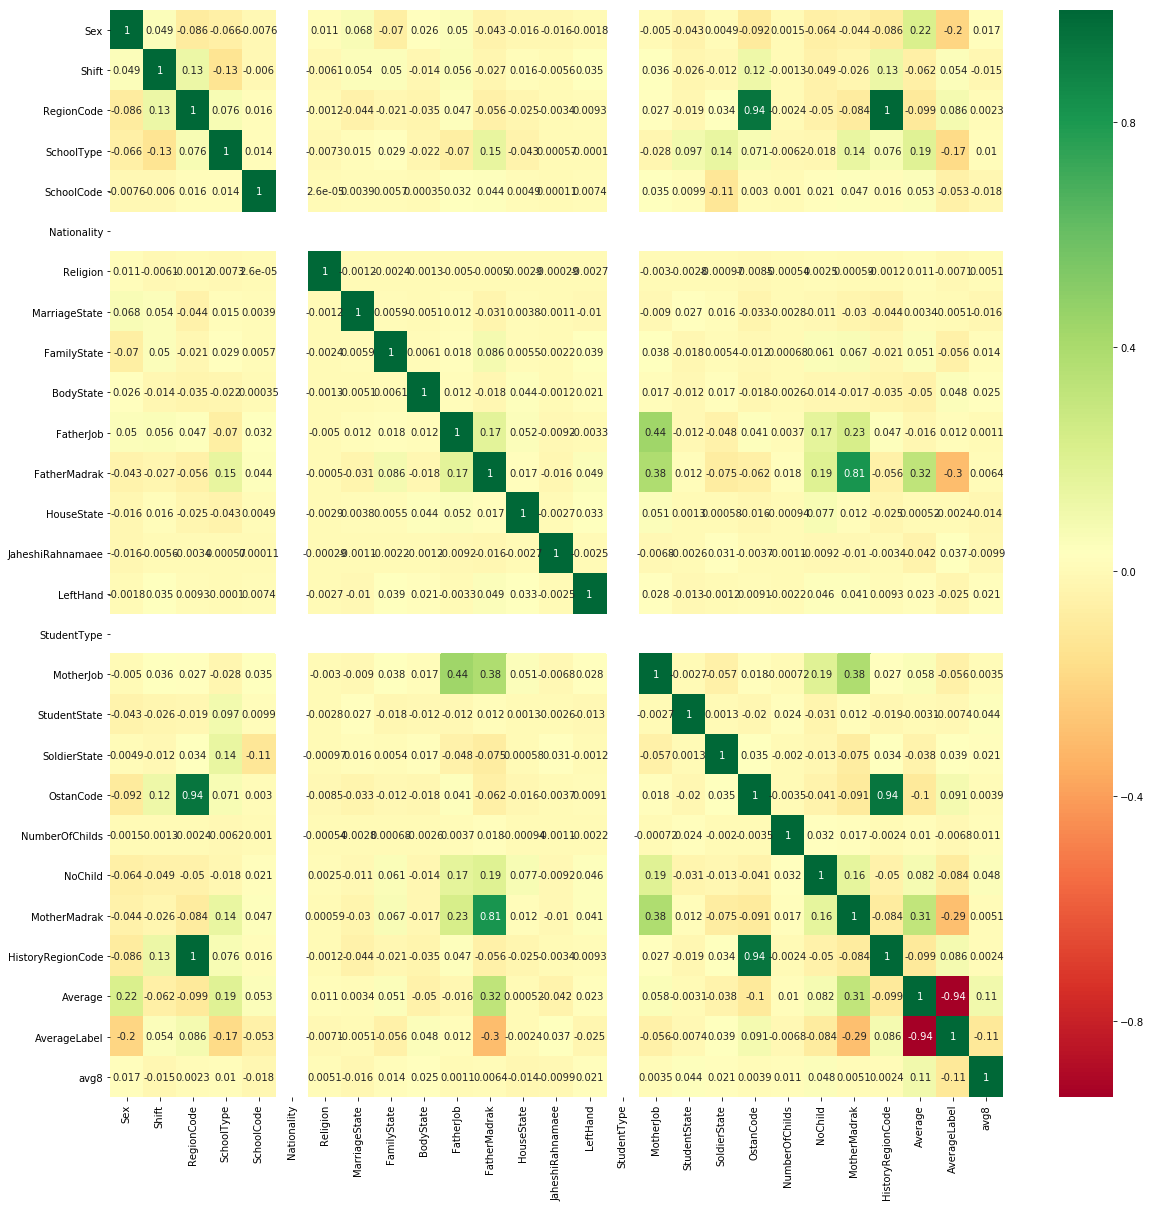

In [0]:
hm_input = hm_input.iloc[:,0:27]
hm_input  = Normalize_Column(hm_input, ['Sex','Shift','RegionCode','SchoolType','SchoolCode','Nationality','Religion','MarriageState','FamilyState',
                                        'BodyState','FatherJob','FatherMadrak','HouseState','LeftHand','StudentType','MotherJob','StudentState','SoldierState',
                                        'OstanCode','NumberOfChilds','NoChild','MotherMadrak','HistoryRegionCode'])
# -----------------------------------------------
# Create HeatMap
X = hm_input.iloc[:,0:27]  #independent columns
y = hm_input['Average']   #target column

#get correlations of each features in dataset
students_corr = hm_input.corr()
top_corr_features = students_corr.index
plot.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(hm_input[top_corr_features].corr(),annot=True,cmap="RdYlGn")
# plot.show()
plt.savefig('1.png', bbox_inches='tight')

# -----------------------------------------------
#Correlation with output variable
cor_target = abs(students_corr["Average"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target> 0]

print('Highly correlated features to Average:')

relevant_features.sort_values(ascending= False)


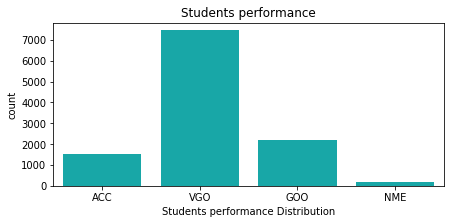

In [0]:
f, ax = plot.subplots(figsize=(7, 3))
chart = sns.countplot(x="Label_AverageLabel", data=students_train, color="c");
chart.set(xlabel='Students performance Distribution', title = 'Students performance')
# plt.show()
students_train['Label_AverageLabel'].value_counts()

plt.savefig('2.png', bbox_inches='tight')

The effect of father's education


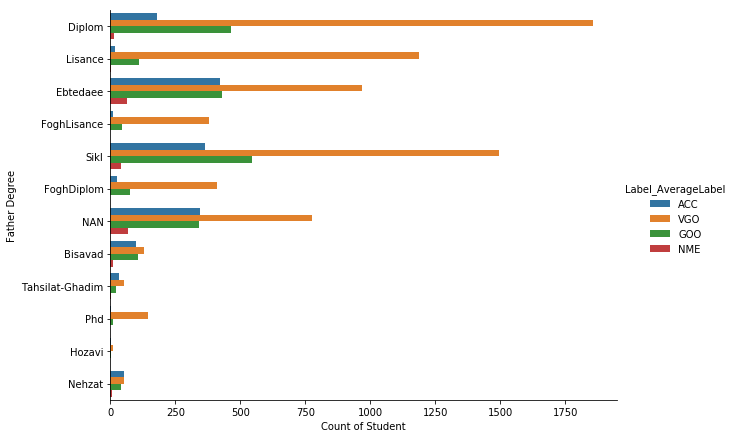

In [0]:
print("The effect of father's education")

chart = sns.catplot(y="Label_FatherMadrak", hue="Label_AverageLabel", data=students_train, kind="count", height=6, aspect = 1.5);
chart.set(xlabel='Count of Student', ylabel='Father Degree')
# plt.show()
plt.savefig('3.png', bbox_inches='tight')

The effect of mother's education


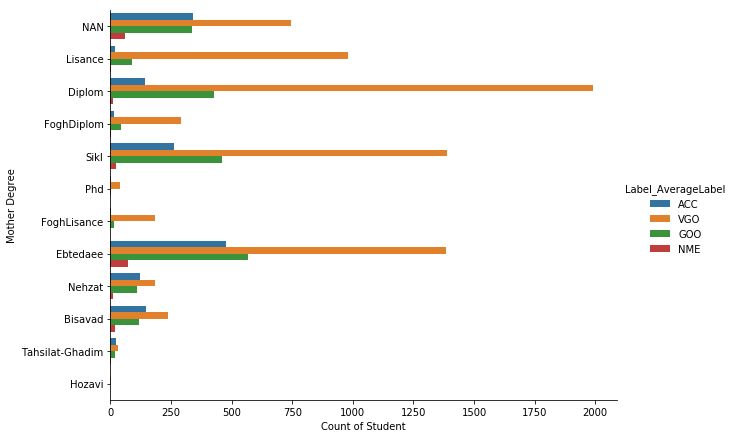

In [0]:
print("The effect of mother's education")

chart = sns.catplot(y="Label_MotherMadrak", hue="Label_AverageLabel", data=students_train, kind="count", height=6, aspect = 1.5);
chart.set(xlabel='Count of Student', ylabel='Mother Degree')
# plt.show()
plt.savefig('4.png', bbox_inches='tight')

Diplom             2509
Sikl               2442
Ebtedaee           1880
NAN                1526
Lisance            1318
FoghDiplom          507
FoghLisance         429
Bisavad             342
Phd                 155
Nehzat              153
Tahsilat-Ghadim     110
Hozavi               16
Name: Label_FatherMadrak, dtype: int64

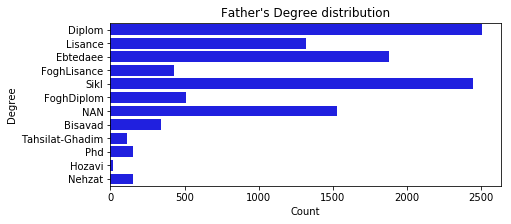

In [0]:

f, ax = plot.subplots(figsize=(7, 3))
chart = sns.countplot(y="Label_FatherMadrak", data=students_train, color="b");
chart.set(xlabel='Count', ylabel='Degree', title="Father's Degree distribution")
# plt.show()
plt.savefig('5.png', bbox_inches='tight')

students_train['Label_FatherMadrak'].value_counts()

Diplom             2569
Ebtedaee           2500
Sikl               2137
NAN                1480
Lisance            1087
Bisavad             519
Nehzat              423
FoghDiplom          351
FoghLisance         203
Tahsilat-Ghadim      73
Phd                  42
Hozavi                3
Name: Label_MotherMadrak, dtype: int64

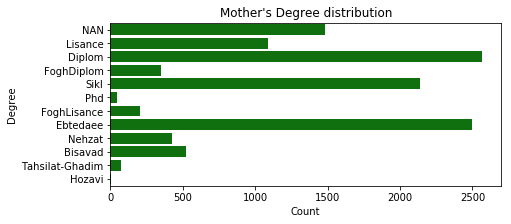

In [0]:
f, ax = plot.subplots(figsize=(7, 3))
chart = sns.countplot(y="Label_MotherMadrak", data=students_train, color="g");
chart.set(xlabel='Count', ylabel='Degree', title="Mother's Degree distribution")
# plt.show()
plt.savefig('6.png', bbox_inches='tight')
students_train['Label_MotherMadrak'].value_counts()

In [0]:
students_train['Label_Sex'].value_counts()

Boy     5826
Girl    5561
Name: Label_Sex, dtype: int64

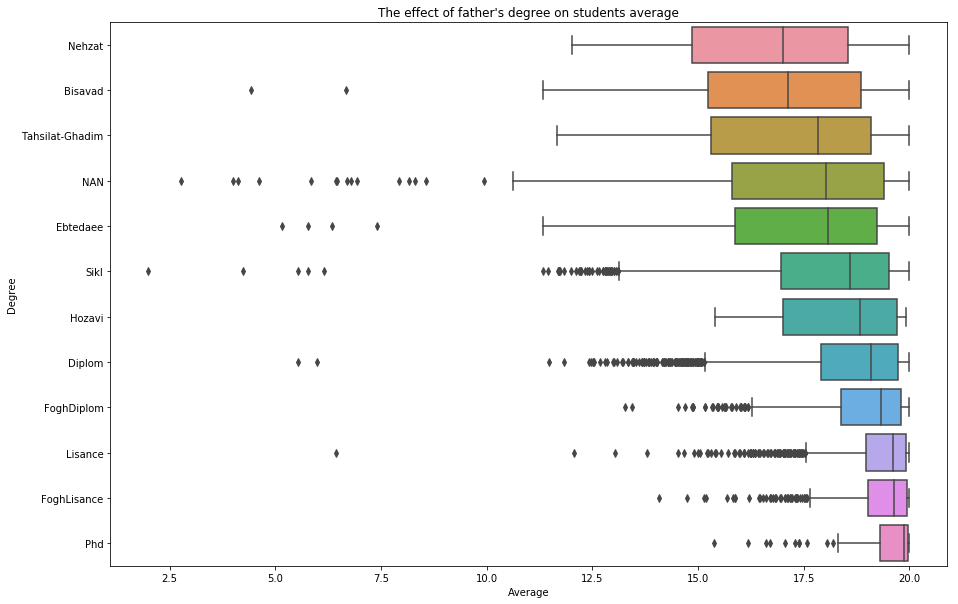

In [0]:
# Analyzing Relationships Between Numerical and Categorical Variables

fig, ax = plt.subplots(figsize=(15, 10))

sorted_Average = students_train.groupby(['Label_FatherMadrak'])['Average'].median().sort_values()
chart = sns.boxplot(x=students_train['Average'], y=students_train['Label_FatherMadrak'], order=list(sorted_Average.index))

chart.set(xlabel="Average", ylabel='Degree',title="The effect of father's degree on students average")
# plt.show()
plt.savefig('7.png', bbox_inches='tight')

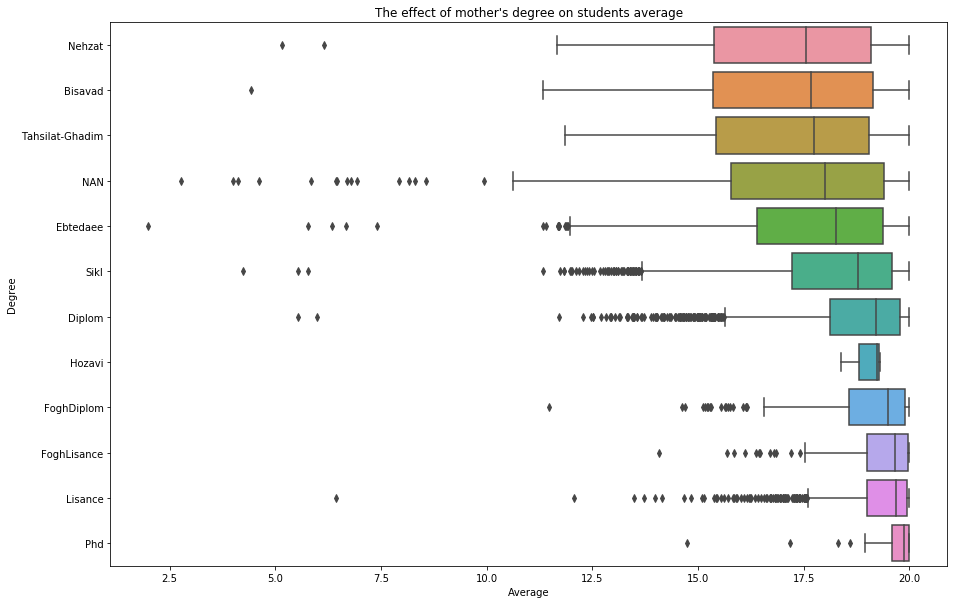

In [0]:
# Analyzing Relationships Between Numerical and Categorical Variables

fig, ax = plt.subplots(figsize=(15, 10))

sorted_Average = students_train.groupby(['Label_MotherMadrak'])['Average'].median().sort_values()
chart = sns.boxplot(x=students_train['Average'], y=students_train['Label_MotherMadrak'], order=list(sorted_Average.index))
chart.set(xlabel="Average", ylabel='Degree',title="The effect of mother's degree on students average")
# plt.show()
plt.savefig('8.png', bbox_inches='tight')

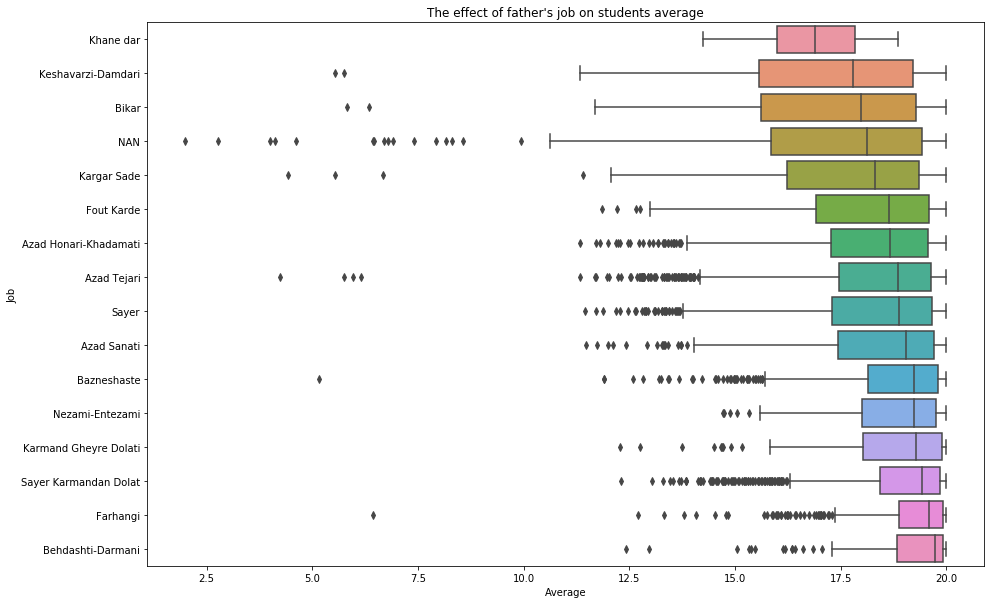

In [0]:
# Analyzing Relationships Between Numerical and Categorical Variables

fig, ax = plt.subplots(figsize=(15, 10))

sorted_Average = students_train.groupby(['Label_FatherJob'])['Average'].median().sort_values()
chart = sns.boxplot(x=students_train['Average'], y=students_train['Label_FatherJob'], order=list(sorted_Average.index))
chart.set(xlabel="Average", ylabel='Job',title="The effect of father's job on students average")
# plt.show()
plt.savefig('9.png', bbox_inches='tight')


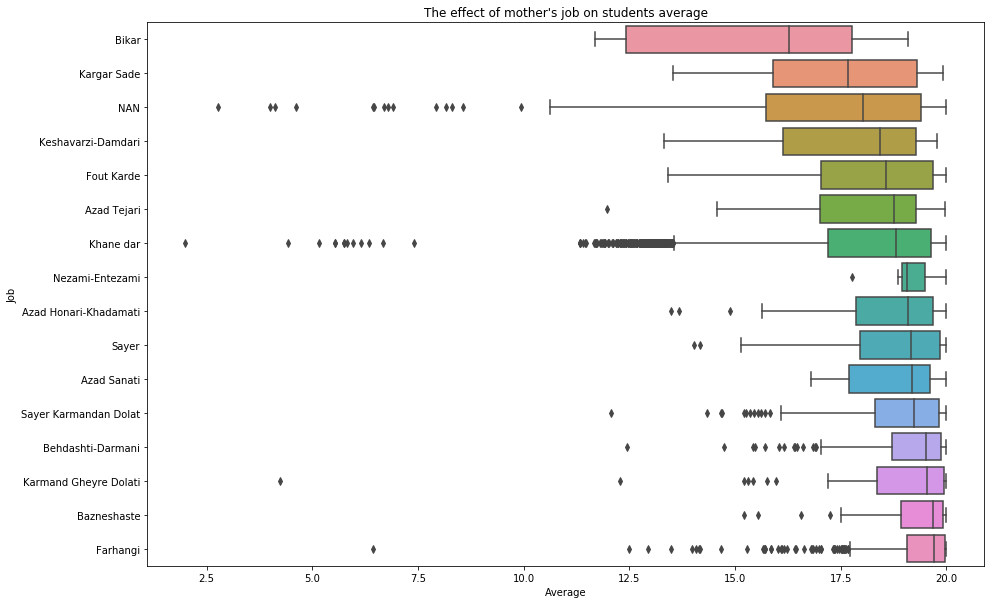

In [0]:
# Analyzing Relationships Between Numerical and Categorical Variables

fig, ax = plt.subplots(figsize=(15, 10))

sorted_Average = students_train.groupby(['Label_MotherJob'])['Average'].median().sort_values()
chart = sns.boxplot(x=students_train['Average'], y=students_train['Label_MotherJob'], order=list(sorted_Average.index))
chart.set(xlabel="Average", ylabel='Job',title="The effect of mother's job on students average")
# plt.show()
plt.savefig('10.png', bbox_inches='tight')

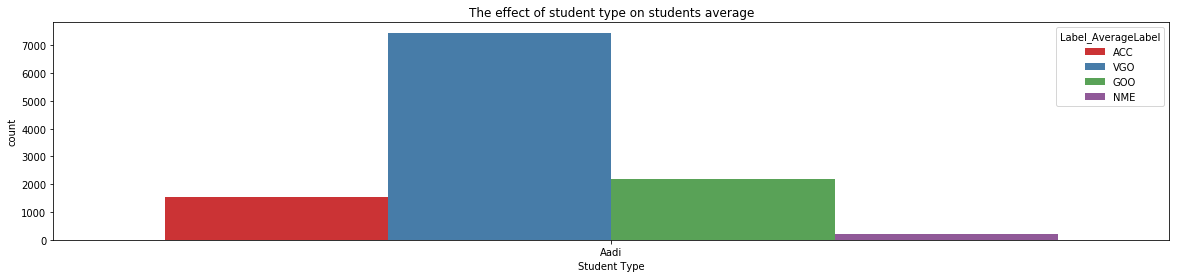

In [0]:
f, ax = plot.subplots(figsize=(20, 4))
chart = sns.countplot(x="Label_StudentType", data=students_train, color="r", hue='Label_AverageLabel', palette="Set1");
chart.set(xlabel="Student Type", title = "The effect of student type on students average")
# plt.show()
plt.savefig('11.png', bbox_inches='tight')

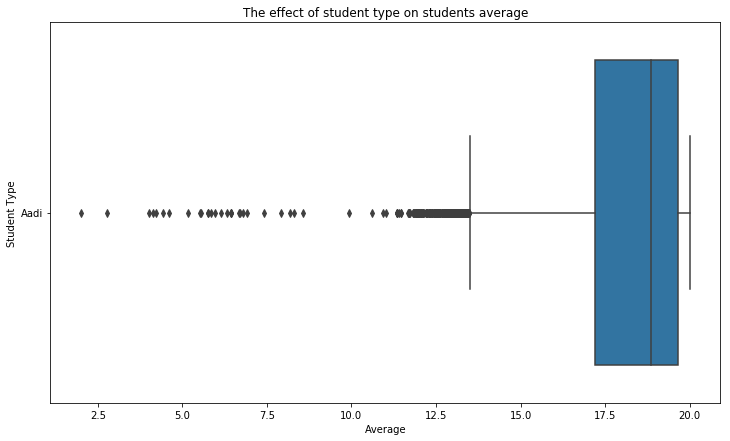

In [0]:
fig, ax = plt.subplots(figsize=(12, 7))

sorted_Average = students_train.groupby(['Label_StudentType'])['Average'].median().sort_values()
chart = sns.boxplot(x=students_train['Average'], y=students_train['Label_StudentType'], order=list(sorted_Average.index))
chart.set(xlabel="Average", ylabel='Student Type',title="The effect of student type on students average")
# plt.show()
plt.savefig('12.png', bbox_inches='tight')

In [0]:
print('Correlation between Sex and AverageLabel : ')
print(abs(students_train[["Sex","AverageLabel"]].corr()))
print('Correlation between LeftHand and AverageLabel : ')
print(abs(students_train[["LeftHand","AverageLabel"]].corr()))

Correlation between Sex and AverageLabel : 
                   Sex  AverageLabel
Sex           1.000000      0.196441
AverageLabel  0.196441      1.000000
Correlation between LeftHand and AverageLabel : 
              LeftHand  AverageLabel
LeftHand      1.000000      0.024603
AverageLabel  0.024603      1.000000


In [0]:
# sns.barplot(x='MotherJob', y='AverageLabel', data=students_train)

In [0]:
# اجراش خیلی طول میکشه
# sns.catplot(x="AverageLabel", y="Label_MotherJob", hue="Label_Sex", kind="swarm", data=students_train);

In [0]:
students_train[['Label_Sex', 'Average']].groupby(['Label_Sex'], as_index=False).mean()

,Label_Sex,Average
0,Boy,17.709402
1,Girl,18.590486


In [0]:
students_frame.shape

(206, 30)

In [0]:
# students_frame.head(3)

AverageLabel1 = students_frame[students_frame.AverageLabel == 1]

AverageLabel2 = students_frame[students_frame.AverageLabel == 2]

AverageLabel3 = students_frame[students_frame.AverageLabel == 3]

AverageLabel4 = students_frame[students_frame.AverageLabel == 4]

print('Students with GPA A : ',AverageLabel1.shape[0])

print('Students with GPA B : ',AverageLabel2.shape[0])

print('Students with GPA C : ',AverageLabel3.shape[0])

print('Students with GPA D : ',AverageLabel4.shape[0])


import numpy as np

high = np.random.randint(low=0, high=AverageLabel1.shape[0] - 1, size=1)

AverageLabel1 = AverageLabel1.iloc[high[0] - 300 : high[0],:]

high = np.random.randint(low=0, high=AverageLabel2.shape[0] - 1, size=1)

AverageLabel2 = AverageLabel2.iloc[high[0] - 300 : high[0],:]

high = np.random.randint(low=0, high=AverageLabel3.shape[0] - 1, size=1)

AverageLabel3 = AverageLabel3.iloc[high[0] - 300 : high[0],:]

# AverageLabel1 = AverageLabel1.sample(n=300)
# AverageLabel2 = AverageLabel2.sample(n=300)
# AverageLabel3 = AverageLabel3.sample(n=300)

print('Students with GPA A : ',AverageLabel1.shape[0])

print('Students with GPA B : ',AverageLabel2.shape[0])

print('Students with GPA C : ',AverageLabel3.shape[0])

print('Students with GPA D : ',AverageLabel4.shape[0])

# high[0]

Students with GPA A :  7456
Students with GPA B :  2178
Students with GPA C :  1547
Students with GPA D :  206
Students with GPA A :  300
Students with GPA B :  300
Students with GPA C :  300
Students with GPA D :  206


In [0]:
students_frame = sklearn.utils.shuffle(pd.concat([AverageLabel1,AverageLabel2, AverageLabel3,AverageLabel4], ignore_index=True))

print(students_frame.shape)

students_frame.head(3)


(1106, 30)


,Sex,Shift,RegionCode,SchoolType,SchoolCode,Nationality,Religion,MarriageState,FamilyState,BodyState,FatherJob,FatherMadrak,HouseState,JaheshiRahnamaee,LeftHand,StudentType,MotherJob,StudentState,SoldierState,OstanCode,NumberOfChilds,NoChild,MotherMadrak,HistoryRegionCode,Average,AverageLabel,avg8,Name,HistoryRegionName,OstanName
127,1,1,1104,4,95096112,1,1,0,0,0,15,9,0,0,0,1,1,1,0,94,0,0,9,1104,19.285714,1,19.285714,فرهنگ,تهران ناحيه ٤,مدارس ايراني خارج از کشور
100,2,1,1728,1,95095739,1,1,0,0,0,1,4,0,0,0,1,4,1,0,17,0,0,5,1728,19.190476,1,0.000000,زينبيه,زرين شهر,اصفهان
684,1,1,1612,1,95114468,1,1,0,0,0,8,4,0,0,0,1,4,1,0,16,3,5,4,1612,13.642857,3,0.000000,شهيد محمدمهدي معلم 1,فريمان,خراسان رضوی


In [0]:
students_train,students_test,y_train,y_test =create_train_test(students_frame)

max_class = students_test['AverageLabel'].value_counts().max()

print('Majority Vote : ',(max_class /students_test.shape[0])*100)

print(students_train.shape)
print(students_test.shape)

Majority Vote :  28.915662650602407
(774, 30)
(332, 30)


In [0]:
def Prepare_Dataset(target_dataset):
  target_dataset = target_dataset.drop('Average',axis = 1)
  target_dataset = target_dataset.drop('AverageLabel',axis = 1)
  target_features = ['Sex','FatherMadrak','MotherMadrak','SchoolType','SchoolType','avg8',
                                        'OstanCode']
  for column in target_dataset.columns:
    if column not in target_features:
      target_dataset = target_dataset.drop(column,axis = 1)
  
  return Normalize_Column(target_dataset,target_features)

# FatherMadrak         0.319544
# MotherMadrak         0.312938
# Sex                  0.220426
# SchoolType           0.187225
# avg8                 0.107124
# OstanCode 

In [0]:
all_features = Prepare_Dataset(students_train)

students_test = Prepare_Dataset(students_test)

In [0]:
students_test.head(3)

,Sex,SchoolType,FatherMadrak,OstanCode,MotherMadrak,avg8
311,0.0,4.0,12.0,18.775510,16.0,18.452381
1081,20.0,0.0,0.0,4.081633,0.0,18.220000
822,0.0,0.0,6.0,15.510204,6.0,0.000000


Acc for AdaBoost is  0.45481927710843373
F1_score for AdaBoost is  0.4394313155792368


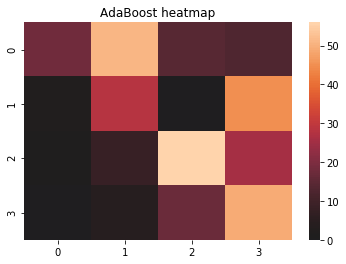

In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score

X, y = make_classification(n_samples=1000, n_features=6,
                           
                           random_state=0, shuffle=True)
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(all_features, y_train)  


clf.feature_importances_  

y_pred = clf.predict(students_test)

# clf.score(y_test, y_pred)  

print ('Acc for AdaBoost is ', accuracy_score(y_test, y_pred))
print ('F1_score for AdaBoost is ', f1_score(y_test, y_pred, average='weighted'))

cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, center=True)
# plt.show()
ax.set_title('AdaBoost heatmap')
plt.savefig('AdaBoost.png', bbox_inches='tight')


Acc for logistic regression is  0.6204819277108434
F1_score for logistic regression is  0.5942342201302734


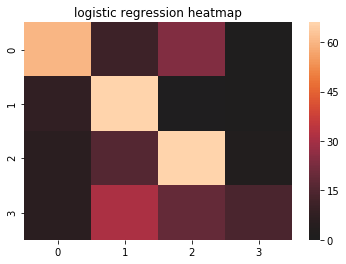

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

clf = LogisticRegression()
clf.fit(all_features, y_train)
y_pred = clf.predict(students_test)


print ('Acc for logistic regression is ', accuracy_score(y_test, y_pred))
print ('F1_score for logistic regression is ', f1_score(y_test, y_pred, average='weighted'))

cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, center=True)
# plt.show()
ax.set_title('logistic regression heatmap')
plt.savefig('logistic regression.png', bbox_inches='tight')

Acc for SVM is  0.5692771084337349
F1_score for SVM is  0.5558751358620424


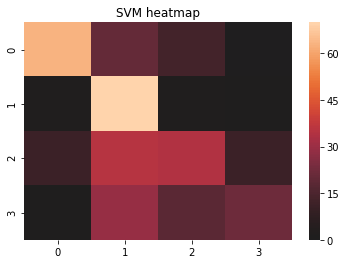

In [0]:
clf = SVC()
clf.fit(all_features, y_train)
y_pred = clf.predict(students_test)


print ('Acc for SVM is ', accuracy_score(y_test, y_pred))
print ('F1_score for SVM is ', f1_score(y_test, y_pred, average='weighted'))

cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, center=True)
# plt.show()
ax.set_title('SVM heatmap')
plt.savefig('SVM.png', bbox_inches='tight')

In [0]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
clf.fit(all_features, y_train)
y_pred = clf.predict(students_test)

Iteration 1, loss = 2.41823233
Iteration 2, loss = 1.47327367
Iteration 3, loss = 1.31893881
Iteration 4, loss = 1.14509029
Iteration 5, loss = 1.04093072
Iteration 6, loss = 1.00588179
Iteration 7, loss = 0.97218247
Iteration 8, loss = 0.95907103
Iteration 9, loss = 0.93998215
Iteration 10, loss = 0.92767779
Iteration 11, loss = 0.91535138
Iteration 12, loss = 0.90876187
Iteration 13, loss = 0.89833982
Iteration 14, loss = 0.89250850
Iteration 15, loss = 0.88840376
Iteration 16, loss = 0.88191145
Iteration 17, loss = 0.87614679
Iteration 18, loss = 0.87115366
Iteration 19, loss = 0.86780792
Iteration 20, loss = 0.86519352
Iteration 21, loss = 0.85963512
Iteration 22, loss = 0.85877270
Iteration 23, loss = 0.85438186
Iteration 24, loss = 0.85111301
Iteration 25, loss = 0.85062986
Iteration 26, loss = 0.84799767
Iteration 27, loss = 0.84596367
Iteration 28, loss = 0.84267151
Iteration 29, loss = 0.84060268
Iteration 30, loss = 0.84048559
Iteration 31, loss = 0.83645883
Iteration 32, los

Acc for MLP is  0.5662650602409639
F1_score for MLP is  0.5790357851935513


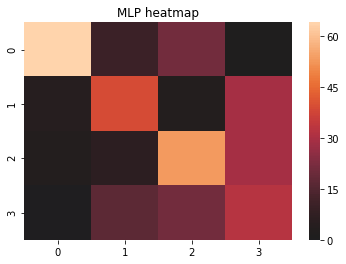

In [0]:
print ('Acc for MLP is ', accuracy_score(y_test, y_pred))
print ('F1_score for MLP is ', f1_score(y_test, y_pred, average='weighted'))

cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, center=True)
# plt.show()
ax.set_title('MLP heatmap')
plt.savefig('MLP.png', bbox_inches='tight')

Acc for Naive Bayes is  0.6566265060240963
F1_score for Naive Bayes is  0.6538681205495459


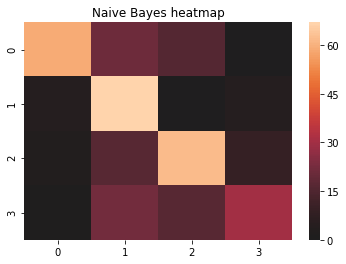

In [0]:
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(all_features, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(students_test)


print ('Acc for Naive Bayes is ', accuracy_score(y_test, y_pred))
print ('F1_score for Naive Bayes is ', f1_score(y_test, y_pred, average='weighted'))

cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, center=True)
# plt.show()
ax.set_title('Naive Bayes heatmap')
plt.savefig('Naive Bayes.png', bbox_inches='tight')

In [0]:
# import keras
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Activation
# from keras.optimizers import SGD

# # Generate dummy data
# # import numpy as np
# # x_train = np.random.random((1000, 20))
# # y_train = keras.utils.to_categorical(np.random.randint(10, size=(1000, 1)), num_classes=10)
# # x_test = np.random.random((100, 20))
# # y_test = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)

# model = Sequential()
# # Dense(64) is a fully-connected layer with 64 hidden units.
# # in the first layer, you must specify the expected input data shape:
# # here, 20-dimensional vectors.
# model.add(Dense(128, activation='relu', input_dim=all_features.shape[1]))
# model.add(Dropout(0.5))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(4, activation='softmax'))

# sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# # model.compile(loss='categorical_crossentropy',optimizer=sgd, metrics=['accuracy'])

# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# model.summary()

# model.fit(all_features, y_train,epochs=32,batch_size=128)
# score = model.evaluate(students_test, y_test, batch_size=128)